In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.0.0'

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data.shape

(10000, 14)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
len(data['RowNumber']), len(data['CustomerId'])

(10000, 10000)

In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

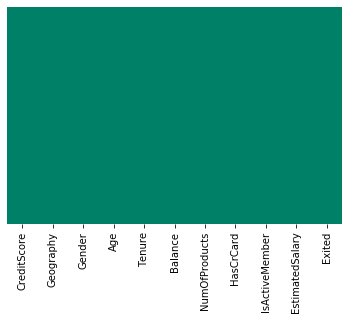

In [8]:
sb.heatmap(data.isna(),
          cbar = False,
          yticklabels = False,
          cmap = 'summer')
plt.show()

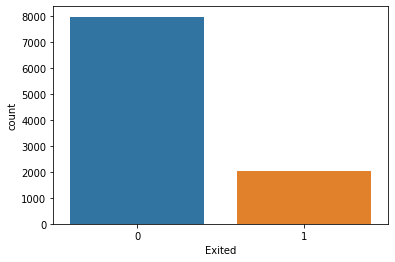

In [9]:
sb.countplot(data['Exited'])
plt.show()

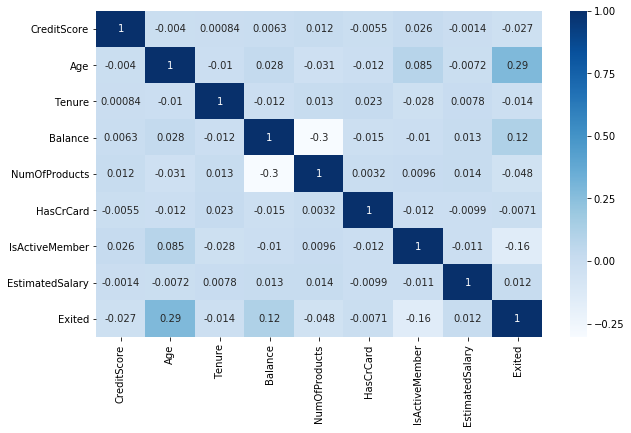

In [10]:
fig, ax = plt.subplots(figsize = (10, 6))

corr = data.corr()
ax = sb.heatmap(corr,
          annot = True,
          cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [11]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


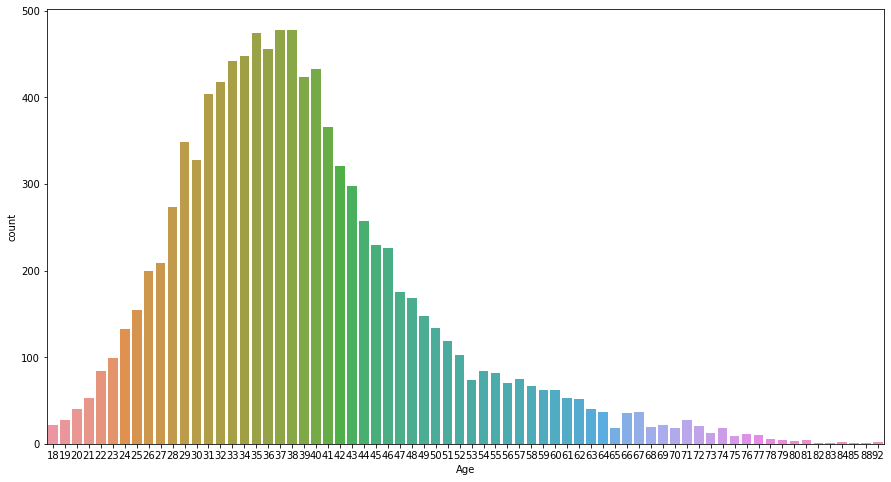

In [12]:
fig, ax = plt.subplots(figsize = (15, 8))

sb.countplot(data['Age'])
plt.show()

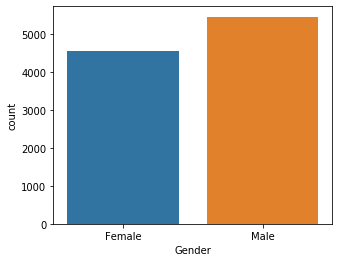

In [13]:
fig, ax = plt.subplots(figsize = (5, 4))

sb.countplot(data['Gender'])
plt.show()

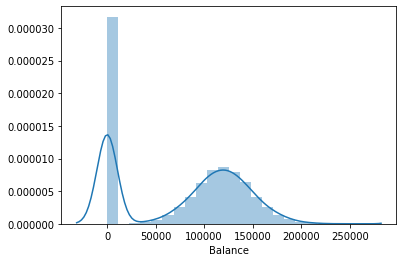

In [14]:
sb.distplot(data['Balance'])
plt.show()

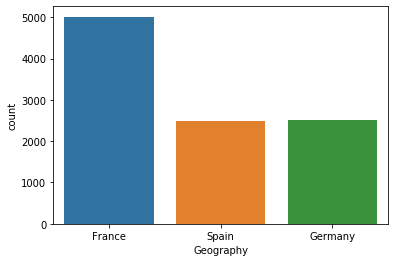

In [15]:
sb.countplot(data['Geography'])
plt.show()

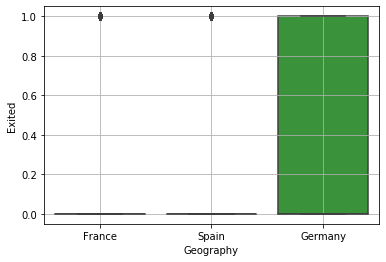

In [16]:
sb.boxplot(x = 'Geography', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

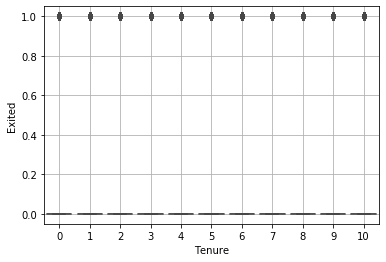

In [17]:
sb.boxplot(x = 'Tenure', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

In [18]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Preprocessing

In [19]:
sc = StandardScaler()
data.iloc[:, [0,3,5,9]] = sc.fit_transform(data.iloc[:, [0,3,5,9]])

In [20]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0


In [21]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Converting Numeric columns to Tensors

In [24]:
CreditScore = tf.feature_column.numeric_column('CreditScore')
Age = tf.feature_column.numeric_column('Age')
Tenure = tf.feature_column.numeric_column('Tenure')
Balance = tf.feature_column.numeric_column('Balance')
EstimatedSalary = tf.feature_column.numeric_column('EstimatedSalary')

# Converting Categorical columns to Tensors

In [35]:
NumOfProducts = tf.feature_column.categorical_column_with_vocabulary_list('NumOfProducts', [1, 3, 2, 4])
HasCrCard = tf.feature_column.categorical_column_with_vocabulary_list('HasCrCard', [0, 1])
IsActiveMember = tf.feature_column.categorical_column_with_vocabulary_list('IsActiveMember', [0, 1])
Geography = tf.feature_column.categorical_column_with_vocabulary_list('Geography', ['France', 'Spain', 'Germany'])
Gender = tf.feature_column.categorical_column_with_vocabulary_list('Gender', ['Female', 'Male'])

In [29]:
CreditScore

NumericColumn(key='CreditScore', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [30]:
NumOfProducts

VocabularyListCategoricalColumn(key='NumOfProducts', vocabulary_list=(1, 3, 2, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)

In [31]:
feat_cols = [CreditScore, Age, Tenure, Balance, EstimatedSalary,
            NumOfProducts, HasCrCard, IsActiveMember, Geography, Gender]

In [32]:
feat_cols

[NumericColumn(key='CreditScore', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Tenure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Balance', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='EstimatedSalary', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 VocabularyListCategoricalColumn(key='NumOfProducts', vocabulary_list=(1, 3, 2, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='HasCrCard', vocabulary_list=(0, 1), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='IsActiveMember', vocabulary_list=(0, 1), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='Geography', vocabulary_list=('France', 'Spain', 'Ge

In [33]:
len(feat_cols)

10

# Train Test Split

In [36]:
X = data.drop('Exited', axis = 1)

In [39]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276


In [40]:
labels = data['Exited']

In [42]:
type(labels)

pandas.core.series.Series

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size = 0.2, random_state = 0)

# Creating an Input Function

In [47]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = x_train, y = y_train,
                                                batch_size = 10, num_epochs = 1000,
                                                shuffle = True)

In [48]:
input_func

<function tensorflow_estimator.python.estimator.inputs.pandas_io.pandas_input_fn.<locals>.input_fn()>

In [49]:
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpj3023kmj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fddd327a910>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [51]:
model.train(input_fn = input_func, steps = 1000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Ins

In [53]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = x_test, y = y_test,
                                                     batch_size = 10, num_epochs = 1,
                                                     shuffle = False)

In [57]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-04T18:40:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpj3023kmj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-04-18:40:44
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8395, accuracy_baseline = 0.7975, auc = 0.83991563, auc_pr

In [58]:
results

{'accuracy': 0.8395,
 'accuracy_baseline': 0.7975,
 'auc': 0.83991563,
 'auc_precision_recall': 0.60393625,
 'average_loss': 0.3719295,
 'label/mean': 0.2025,
 'loss': 0.37192956,
 'precision': 0.66935486,
 'prediction/mean': 0.2178758,
 'recall': 0.40987656,
 'global_step': 1000}